# Normalized Spectral Clustering

In [1]:
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
c=['red','blue','green','black','lightgrey','cyan','orange','magenta','yellow','purple','violet','pink','olive','grey','brown']

# Funtion to create adjacency matrix by using RBF kernel 

In [2]:
def adjacency_matrix(X,sigma):
    W=np.zeros((X.shape[0],X.shape[0]))
    for i in range(0,X.shape[0]):
        for j in range(0,X.shape[0]):
            norm=np.square(np.linalg.norm(X[i]-X[j]))
            W[i][j]=np.exp(-norm/(2*sigma**2))
    return W

# Funtion to create degree matrix

In [3]:
def Degree_matrix(X,sigma):
    W=adjacency_matrix(X,sigma)
    d=np.sum(W,axis=1)
    D=np.zeros((W.shape[0],W.shape[0]))
    for i in range(D.shape[0]):
        for j in range(D.shape[0]):
            if(i==j):
                D[i][j]=d[i]
    return D

# Funtion to get the solution f by minimizing the relationship measure

In [4]:
def soln_f(X,sigma,k):
    D=Degree_matrix(X,sigma)
    W=adjacency_matrix(X,sigma)
    D[np.diag_indices(D.shape[1])] = 1/ (D.diagonal()**0.5)
    L_new=np.dot((np.dot(D,W)),D)
    eigen_vals, eigen_vectors = np.linalg.eig(L_new)
    idx = eigen_vals.real.argsort()[-k:eigen_vals.shape[0]]
    f=np.empty(shape=[L_new.shape[0],0])
    for i in range(0,k):
        f=np.hstack((f,eigen_vectors[:,idx]))
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            f[i][j] = f[i][j]/np.linalg.norm(f[i]) 
    return f

In [5]:
def Spectral_Clustering(X, random_state_=0,sigma=1,k=1,type_='k-means++',n_init_=10,max_iter_=300,tol_=1e-04):
    km=KMeans(n_clusters=k, init=type_,
                  n_init=n_init_, max_iter=max_iter_,
                  tol=tol_, random_state=random_state_)
    km.fit(soln_f(X,sigma,k))
    y_km=km.predict(soln_f(X,sigma,k))
    return y_km

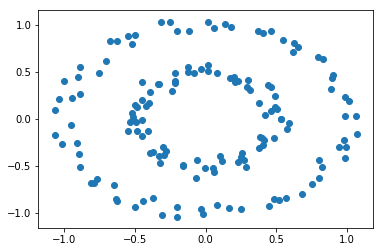

In [6]:
X,y = make_circles(n_samples=150, factor=.5,
                   noise=.05)
plt.scatter(X[:,0],X[:,1])
plt.show()

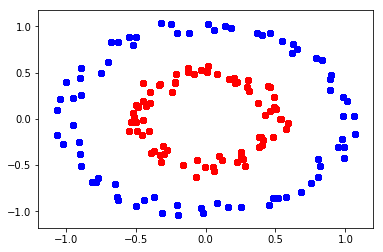

In [7]:
y_km=Spectral_Clustering(X,0,0.1,2)
for i in y_km:
    plt.scatter(X[y_km==i,0],X[y_km==i,1],c=c[i])
plt.show()

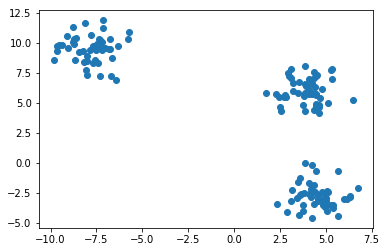

In [8]:
X,y = make_blobs(n_samples=150, random_state=47)
plt.scatter(X[:,0],X[:,1])

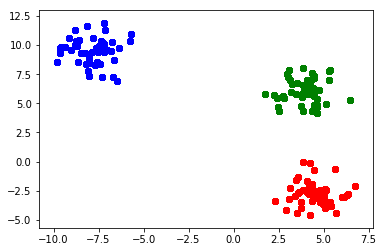

In [9]:
y_km=Spectral_Clustering(X,0,0.5,3)
for i in y_km:
    plt.scatter(X[y_km==i,0],X[y_km==i,1],c=c[i])
plt.show()

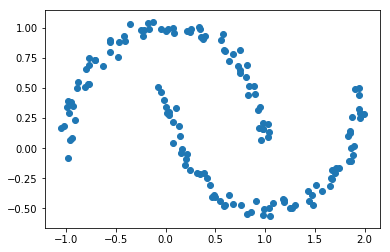

In [10]:
X,y = make_moons(n_samples=150,noise=.05)
plt.scatter(X[:,0],X[:,1])

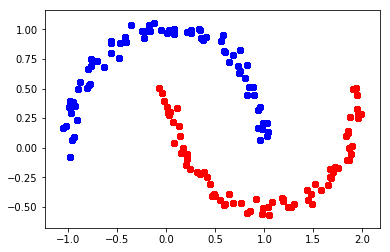

In [11]:
y_km=Spectral_Clustering(X,0,0.1,2)
for i in y_km:
    plt.scatter(X[y_km==i,0],X[y_km==i,1],c=c[i])
plt.show()

In [12]:
filePath1 = "test1_data.txt"
X = np.loadtxt(filePath1, delimiter=" ")

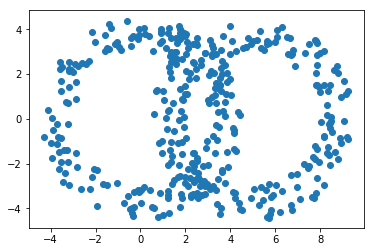

In [13]:
plt.scatter(X[:,0],X[:,1])

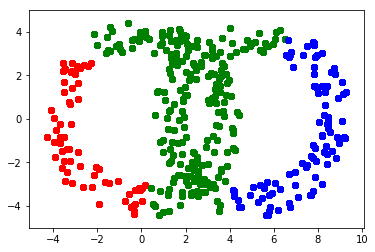

In [14]:
y_km=Spectral_Clustering(X,0,0.4,3)
for i in y_km:
    plt.scatter(X[y_km==i,0],X[y_km==i,1],c=c[i])
plt.show()

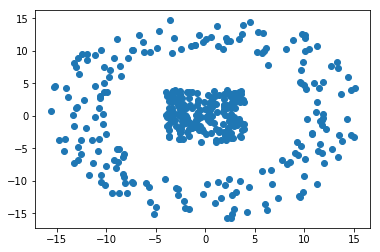

In [15]:
filePath2 = "test2_data.txt"
X = np.loadtxt(filePath2, delimiter=" ")
plt.scatter(X[:,0],X[:,1])

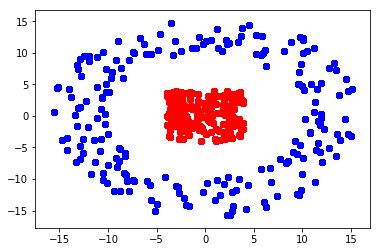

In [16]:
y_km=Spectral_Clustering(X,0,0.5,2)
for i in y_km:
    plt.scatter(X[y_km==i,0],X[y_km==i,1],c=c[i])
plt.show()

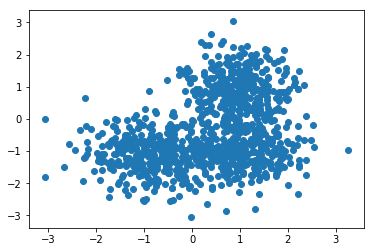

In [17]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=0.6)
plt.scatter(X[:,0],X[:,1])

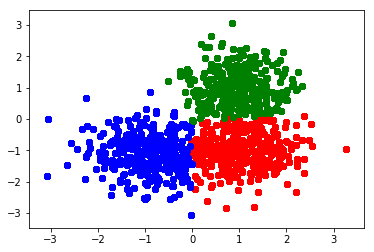

In [18]:
y_km=Spectral_Clustering(X,0,0.5,3)
for i in y_km:
    plt.scatter(X[y_km==i,0],X[y_km==i,1],c=c[i])
plt.show()

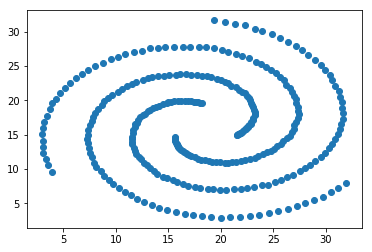

In [19]:
filePath2 = "spiral.txt"
X = np.loadtxt(filePath2, delimiter=" ")
plt.scatter(X[:,0],X[:,1])

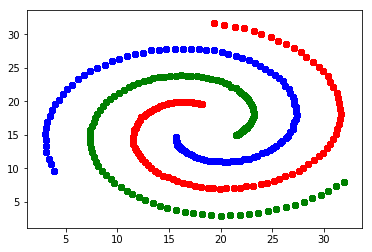

In [20]:
y_km=Spectral_Clustering(X,0,0.5,3)
for i in y_km:
    plt.scatter(X[y_km==i,0],X[y_km==i,1],c=c[i])
plt.show()

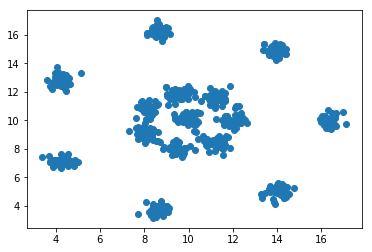

In [21]:
filePath2 = "R15.txt"
X = np.loadtxt(filePath2, delimiter=" ")
plt.scatter(X[:,0],X[:,1])

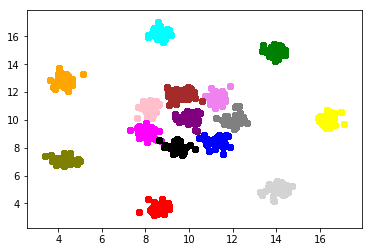

In [22]:
y_km=Spectral_Clustering(X,0,0.5,15)
for i in y_km:
    plt.scatter(X[y_km==i,0],X[y_km==i,1],c=c[i])
plt.show()

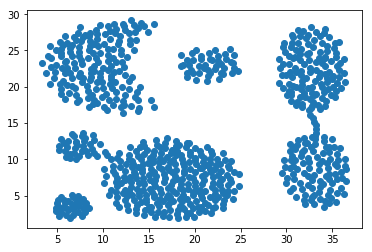

In [23]:
filePath2 = "Aggregation.txt"
X = np.loadtxt(filePath2, delimiter=" ")
plt.scatter(X[:,0],X[:,1])

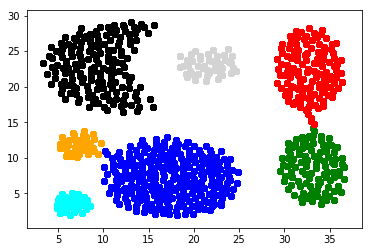

In [24]:
y_km=Spectral_Clustering(X,0,0.5,7)
for i in y_km:
    plt.scatter(X[y_km==i,0],X[y_km==i,1],c=c[i])
plt.show()

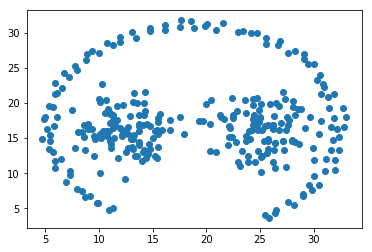

In [25]:
filePath2 = "pathbased.txt"
X = np.loadtxt(filePath2, delimiter=" ")
plt.scatter(X[:,0],X[:,1])

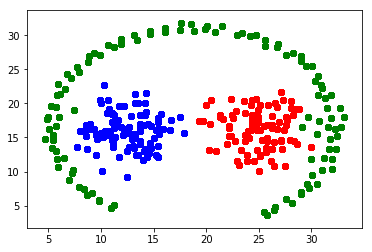

In [26]:
y_km=Spectral_Clustering(X,0,0.5,3)
for i in y_km:
    plt.scatter(X[y_km==i,0],X[y_km==i,1],c=c[i])
plt.show()